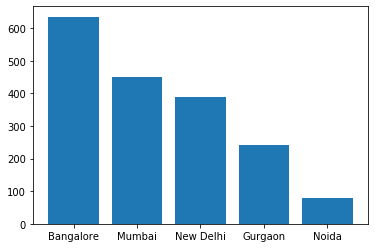

In [30]:
'''
Q.1.
Your Friend has developed the Product and he wants to establish the product startup and he is searching 
for a perfect location where getting the investment has a high chance. But due to its financial restriction, 
he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your 
friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most 
number of funding is done. That means, find the location where startups has received funding maximum 
number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". 
Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". 
For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of 
the city lies in given locations.

Answer: As I need the names of the location so I need to make sure that there is no missing value in 
the CityLocation column, hence I have dropped all the rows wherein missing value is present in CityLocation. 
Now second challenge is to handle the case where startup has been established in more than one locations,
now I city names which are based in India, and the question it has been mentioned earlier that, firstcity name
will be based Indian city name, so I have splited the city names with '/' and picked the first name and return
using my city_name function. 

    There are some cases wherein I need to update city names with proper ones which I have done using pandas
replace method i.e I have update the name of 'Delhi' to 'New Delhi', 'bangalore' to 'Bengalore'. Now I have
proper city names. Now I have used pandas method, value_counts on CityLocation column which returned me the
City Names with the count of startups estabilished there. Now I have made one set of target_locations wherein
my friend wants to establish the startup. Before that I have made two list one for city names and the other one 
for counts of startups that is established on that particular city. I did some memory and time optimisation by 
modifying the using same lists. After all I have got the number of startups that has been established in the
specified location by my friend and Now I have ploted and got that Bangalore has the highest number of startups
established there. So it would be great if my friend choose to go with location Bangalore. 

'''

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()

# File data to Pandas DataFrame
df_startups = pd.read_csv('startup_funding.csv',encoding='utf-8')
df_startups['CityLocation'].dropna(inplace = True) # Cities without any name removed
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)
city_funding_count = df_startups['CityLocation'].value_counts()
cities = list(city_funding_count.index) # Get City Names in python list
funding_counts = list(city_funding_count.values)# Get Funding Numbers in python list

# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}

## Optimisation starts (Time Complexity O(N))
actual_city_count = 0 
city_pointer = 0 
total_city = len(cities) 

# Pick only cities which are required
while city_pointer<total_city:
    if cities[city_pointer] in target_locations:
        cities[actual_city_count] = cities[city_pointer]
        funding_counts[actual_city_count] = funding_counts[city_pointer]
        actual_city_count+=1
        
    city_pointer+=1

cities = cities[:actual_city_count]
funding_counts = funding_counts[:actual_city_count]

## Optimisation ends

# Plot Bar-graph
plt.bar(cities,funding_counts)
plt.show()

# Answer: From the Bar graph we can see that location 'Bangalore'
# got maximum number of times funding. So if my friend estabilish his
# startup in this location i.e Bangalore, then there is a high chance of
# getting investment. 
